# cat_dog_classifier

In [ ]:
%tensorboard

In [1]:
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import pathlib

In [2]:
animal_class_map = ['Cat', 'Dog']
cat_class_map = ['Abyssinian','American_Bobtail','American_Curl','American_Shorthair','American_Wirehair','Applehead_Siamese','Balinese','Bengal','Birman','Bombay','British_Shorthair','Burmese','Burmilla','Calico','Canadian_Hairless','Chartreux','Chausie','Chinchilla','Cornish_Rex','Cymric','Devon_Rex','Dilute_Calico','Dilute_Tortoiseshell','Domestic_Long_Hair','Domestic_Medium_Hair','Domestic_Short_Hair','Egyptian_Mau','Exotic_Shorthair','Havana','Himalayan','Japanese_Bobtail','Javanese','Korat','LaPerm','Maine_Coon','Manx','Munchkin','Nebelung','Norwegian_Forest_Cat','Ocicat','Oriental_Long_Hair','Oriental_Short_Hair','Oriental_Tabby','Persian','Pixiebob','Ragamuffin','Ragdoll','Russian_Blue','Scottish_Fold','Selkirk_Rex','Siamese','Siberian','Silver','Singapura','Snowshoe','Somali','Sphynx','Tabby','Tiger','Tonkinese','Torbie','Tortoiseshell','Turkish_Angora','Turkish_Van','Tuxedo','York_Chocolate']
dog_class_map = ['Affenpinscher','Afghan_Hound','African_Hunting_Dog','Airedale','American_Staffordshire_Terrier','Appenzeller','Australian_Terrier','Basenji','Basset','Beagle','Bedlington_Terrier','Bernese_Mountain_Dog','Black-and-Tan_Coonhound','Blenheim_Spaniel','Bloodhound','Bluetick','Border_Collie','Border_Terrier','Borzoi','Boston_Bull','Bouvier_des_Flandres','Boxer','Brabancon_Griffon','Briard','Brittany_Spaniel','Bull_Mastiff','Bulldog','Cairn','Cardigan','Chesapeake_Bay_Retriever','Chihuahua','Chow','Clumber','Cocker_Spaniel','Collie','Curly-Coated_Retriever','Dandie_Dinmont','Dhole','Dingo','Doberman','English_Foxhound','English_Setter','English_Springer','EntleBucher','Eskimo_Dog','Flat-Coated_Retriever','German_Shepherd','German_Short-Haired_Pointer','Giant_Schnauzer','Golden_Retriever','Gordon_Setter','Great_Dane','Great_Pyrenees','Greater_Swiss_Mountain_Dog','Groenendael','Havanese','Ibizan_Hound','Irish_Setter','Irish_Terrier','Irish_Water_Spaniel','Irish_Wolfhound','Italian_Greyhound','Japanese_Chin','Japanese_Spaniel','Keeshond','Kelpie','Kerry_Blue_Terrier','Komondor','Kuvasz','Labrador_Retriever','Lakeland_Terrier','Leonberg','Lhasa','Malamute','Malinois','Maltese','Mexican_Hairless','Miniature_Pinscher','Miniature_Poodle','Miniature_Schnauzer','Newfoundland','Norfolk_Terrier','Norwegian_Elkhound','Norwich_Terrier','Old_English_Sheepdog','Otterhound','Papillon','Pekinese','Pembroke','Pitbull','Pomeranian','Pug_','Redbone','Rhodesian_Ridgeback','Rottweiler','Saint_Bernard','Saluki','Samoyed','Schipperke','Scotch_Terrier','Scottish_Deerhound','Sealyham_Terrier','Shetland_Sheepdog','Shiba_Inu','Shih-Tzu','Siberian_Husky','Silky_Terrier','Soft-Coated_Wheaten_Terrier','Staffordshire_Bullterrier','Standard_Poodle','Standard_Schnauzer','Sussex_Spaniel','Tibetan_Mastiff','Tibetan_Terrier','Toy_Poodle','Toy_Terrier','Vizsla','Walker_Hound','Weimaraner','Welsh_Springer_Spaniel','West_Highland_White_Terrier','Wheaten_Terrier','Whippet','Wire-Haired_Fox_Terrier','Yorkshire_Terrier']


In [3]:
dataset_name = 'cat_vs_dog'
data_dir = f'/root/.keras/datasets/{dataset_name}'
if not os.path.isdir(data_dir):
        dataset_url = f'https://datasets-349058029.s3.us-west-2.amazonaws.com/cat_dog_classifier/{dataset_name}.zip'
        tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir)
print(f"{len(list(data_dir.glob('*/*.jpg')))} images in dataset")

25000 images in dataset


In [4]:
batch_size = 64
img_size = 224

ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  shuffle=True,
  image_size=(img_size, img_size),
  batch_size=batch_size)
ds = ds.take(int(0.1 * len(ds)))


Found 25000 files belonging to 2 classes.


In [5]:
# 2 200
animal_model = tf.keras.models.load_model('models/cat_vs_dog_2layers_200nodes.h5')
# 1 700
cat_breed_model = tf.keras.models.load_model('models/cat_breeds_1layers_700nodes.h5')
# 1 1000
dog_breed_model = tf.keras.models.load_model('models/dog_breeds_1layers_700nodes.h5')

feature_extractor = MobileNetV2(input_shape=(img_size, img_size, 3),
                                               include_top=False,
                                               weights='imagenet')

num_feature_extractor_layers = len(feature_extractor.layers)

animal_classifier = tf.keras.Sequential([layers.InputLayer(input_shape=(7, 7, 1280)), *animal_model.layers[2:]])
cat_breed_classifier = tf.keras.Sequential([layers.InputLayer(input_shape=(7, 7, 1280)), *cat_breed_model.layers[2:]])
dog_breed_classifier = tf.keras.Sequential([layers.InputLayer(input_shape=(7, 7, 1280)), *dog_breed_model.layers[2:]])

In [6]:
input_layer = layers.Input(shape=(img_size, img_size, 3))
rescaling_layer = layers.Rescaling(1./127.5, offset=-1)(input_layer)
feature_layer = feature_extractor(rescaling_layer)
animal_output = animal_classifier(feature_layer)
cat_output = cat_breed_classifier(feature_layer)
dog_output = dog_breed_classifier(feature_layer)

combined_model = tf.keras.Model(inputs=[input_layer], outputs=[animal_output, cat_output, dog_output])
combined_model.summary()
combined_model.save('./models/combined_model.h5')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 mobilenetv2_1.00_224 (Function  (None, 7, 7, 1280)  2257984     ['rescaling[0][0]']              
 al)                                                                                              
                                                                                              

animal detected? 0.9578514
likely animal: Dog 99 %
cat prediction: British_Shorthair 21 %
dog prediction: Flat-Coated_Retriever 36 %


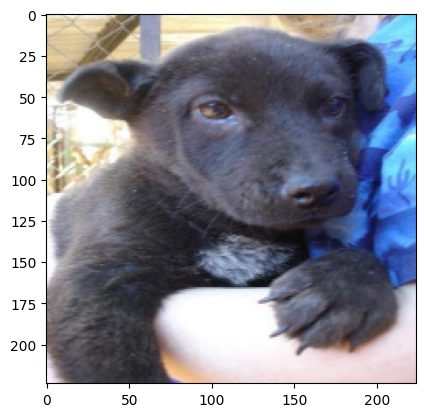

In [11]:
tensor = list(ds.take(1))[0][0][0]
pred = combined_model.predict(tf.expand_dims(tensor, 0))
cat_vs_dog_logits, cat_probs, dog_probs = pred
cat_vs_dog_linear = tf.nn.sigmoid(cat_vs_dog_logits).numpy()
cat_vs_dog_probs = tf.nn.softmax(cat_vs_dog_logits).numpy()
print('animal detected?', cat_vs_dog_linear.max())
print('likely animal:', animal_class_map[cat_vs_dog_probs.argmax()], int(cat_vs_dog_probs.max()*100), '%')
print('cat prediction:', cat_class_map[cat_probs.argmax()], int(cat_probs.max()*100), '%')
print('dog prediction:', dog_class_map[dog_probs.argmax()], int(dog_probs.max()*100), '%')
im = tf.keras.utils.img_to_array(tensor, dtype=int)
plt.imshow(im)
plt.show()


In [12]:
!tensorflowjs_converter --input_format=keras --output_format=tfjs_graph_model './models/combined_model.h5' './tfjs_models/combined_model'

2022-03-26 05:56:04.544265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-26 05:56:04.548750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-26 05:56:04.548953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-26 05:56:04.549278: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [13]:
import os
import boto3

directory = f'./tfjs_models/combined_model'
s3_client = boto3.client('s3')

for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    filename = f.split('/')[-1]
    s3_client.upload_file(
      f,
      'built-model-repository',
      f'cat_dog_classifier/combined_model/{filename}',
      ExtraArgs={'ACL': 'public-read'}
    )